In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [2]:
obs = pd.read_csv('observations.csv')
spc = pd.read_csv('species_info.csv')

In [3]:
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [5]:
obs.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [6]:
spc.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [7]:
spc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [8]:
spc.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [9]:
len(spc.common_names.unique())

5504

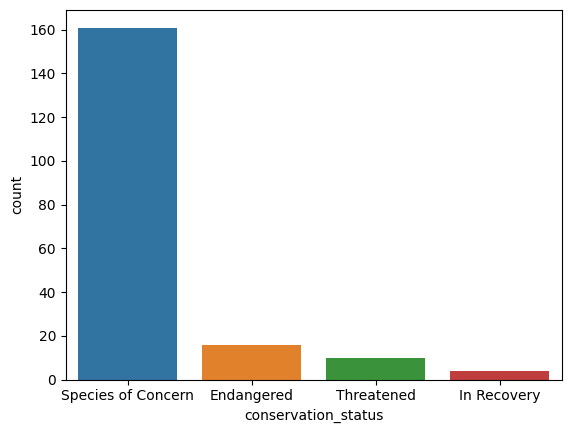

<Figure size 640x480 with 0 Axes>

In [14]:
# Distribution of conservation status of animals
sns.countplot(data=spc,x='conservation_status')
plt.show()
plt.clf()

Out of the 5504 unique animals, around 160 animals are 'species of concern', less than 20 are endangered, nearly 10 are threatened and on the positive note a few are on the recovery in numbers 

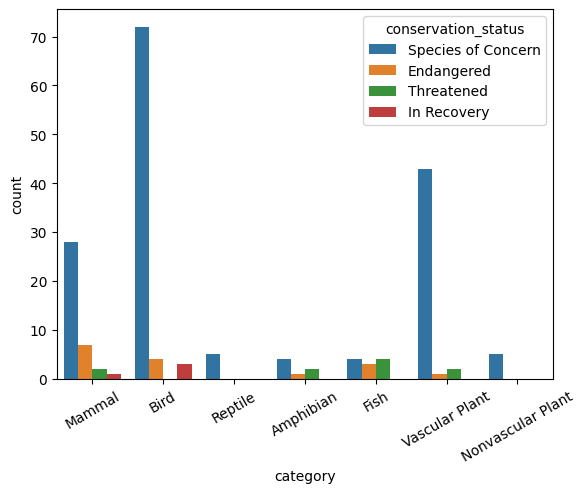

<Figure size 640x480 with 0 Axes>

In [16]:
# Distribution of conservation status of animals per species
sns.countplot(data=spc[~spc.conservation_status.isna()],x='category', hue="conservation_status")
plt.xticks(rotation = 30)
plt.show()
plt.clf()

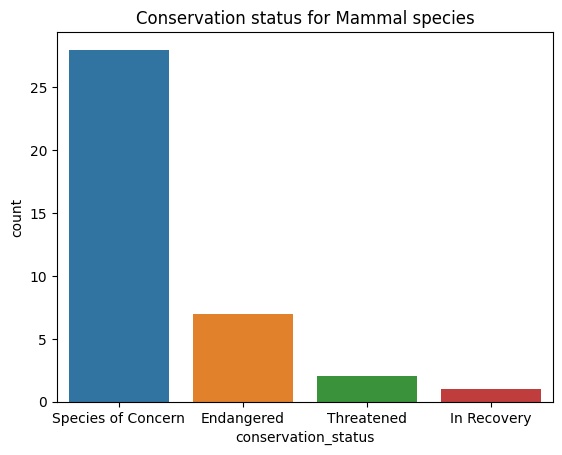

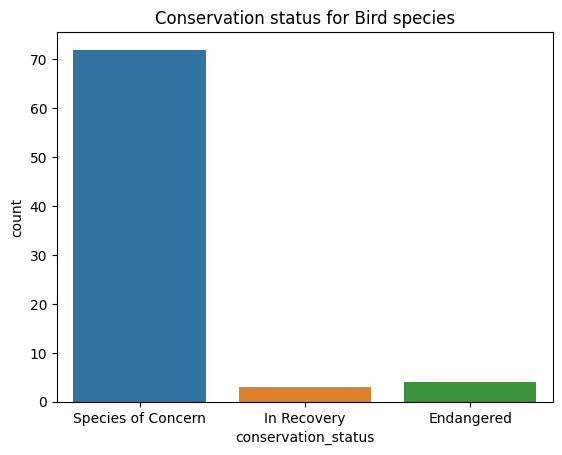

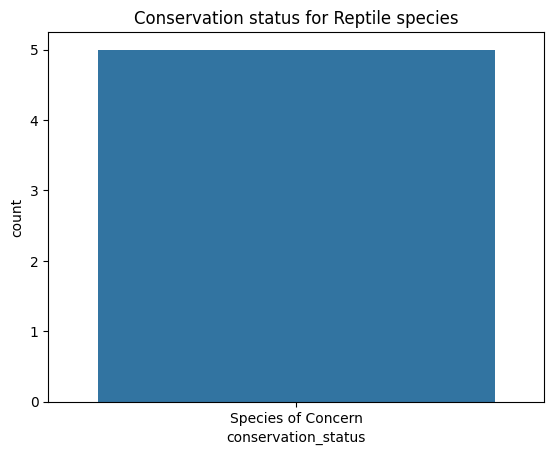

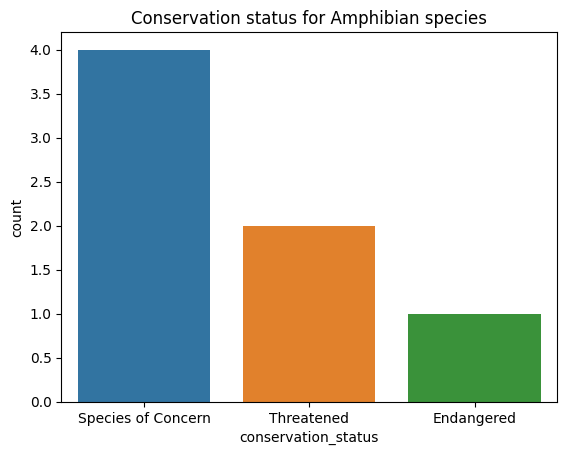

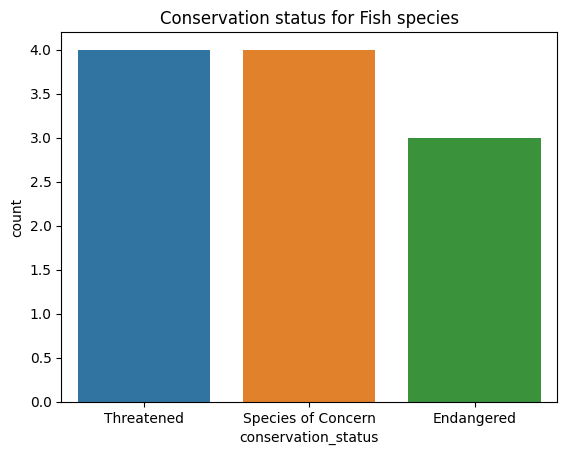

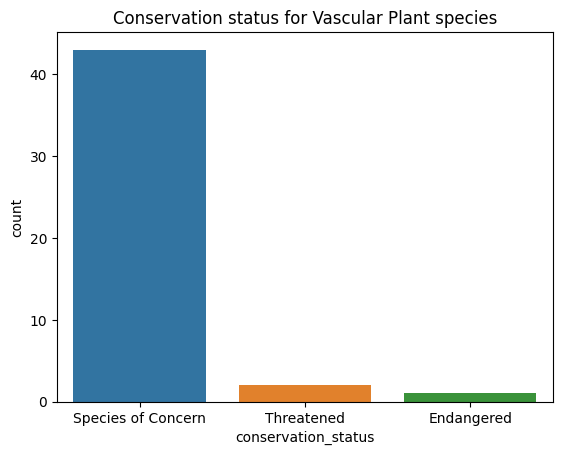

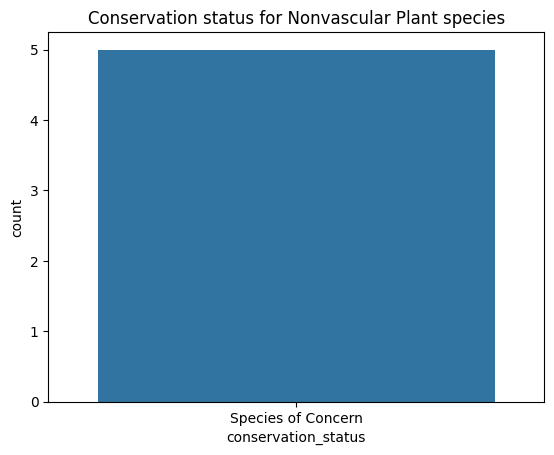

<Figure size 640x480 with 0 Axes>

In [20]:
spec_un = spc.category.unique()
spc_cat = spc[~spc.conservation_status.isna()]
for spec in spec_un:
    sns.countplot(data=spc_cat[spc_cat.category == spec],x='conservation_status')
    plt.title('Conservation status for {0} species'.format(spec))
    # plt.xticks(rotation = 30)
    plt.show()
    plt.clf()


In [22]:
obs[obs.observations == obs.observations.max()]

,scientific_name,park_name,observations
11281,Lycopodium tristachyum,Yellowstone National Park,321
